In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import optuna

from backtest import backtest_dca

In [2]:
# df_origin = pd.read_csv("crypto.csv", index_col=0, parse_dates=True)
df_origin = pd.read_csv("stock.csv", index_col=0, parse_dates=True)
# df_origin = pd.read_csv("ucits_etf_market.csv", index_col=0, parse_dates=True)

# df_origin = df_origin.iloc[1:]
df_origin = df_origin.dropna()
df_origin

,SAP.DE,RHM.DE,HSBA.L,BAB.L,IBM,ASML.AS,JNJ,GOOGL,AAPL,MSFT
Date,,,,,,,,,,
2023-01-03,98.510002,200.500000,529.900024,290.600006,141.550003,520.299988,178.190002,89.120003,125.070000,239.580002
2023-01-04,100.699997,199.000000,543.500000,293.399994,142.600006,537.000000,180.130005,88.080002,126.360001,229.100006
2023-01-05,100.839996,202.100006,565.299988,294.799988,141.110001,539.900024,178.800003,86.199997,125.019997,222.309998
2023-01-06,102.339996,209.399994,568.599976,297.399994,143.699997,551.500000,180.250000,87.339996,129.619995,224.929993
2023-01-09,104.559998,213.000000,563.200012,290.000000,143.550003,586.599976,175.580002,88.019997,130.149994,227.119995
...,...,...,...,...,...,...,...,...,...,...
2025-12-19,208.800003,1559.500000,1167.000000,1250.000000,300.980011,901.599976,206.369995,307.160004,273.670013,485.920013
2025-12-22,208.550003,1545.000000,1167.199951,1253.000000,302.790009,896.000000,207.320007,309.779999,270.970001,484.920013
2025-12-23,207.699997,1541.000000,1175.199951,1257.000000,303.779999,903.200012,205.779999,314.350006,272.359985,486.850006


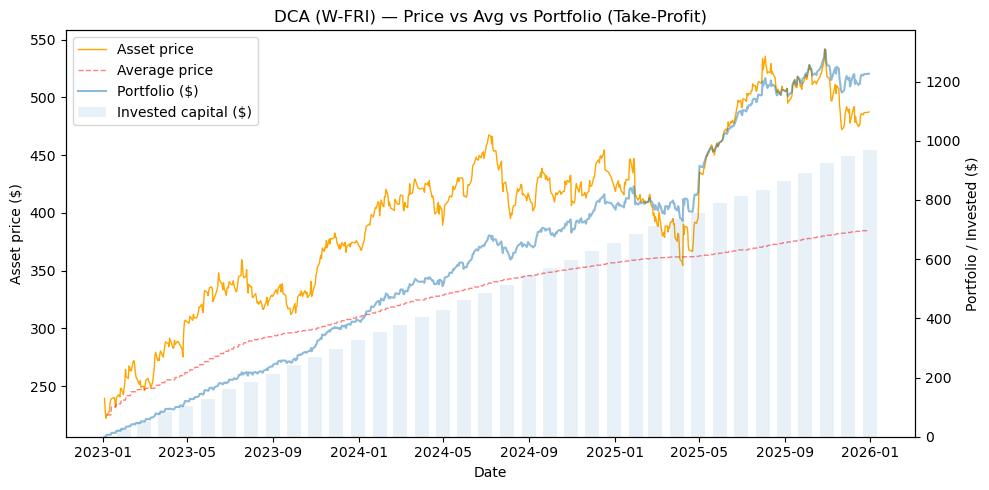

In [3]:
sol_prices = df_origin["MSFT"]
invest_sum = 1000 / (52 * 3)

res, metric = backtest_dca(
    prices=sol_prices,
    buy_amount=invest_sum,
    freq="W-FRI",
    available_sum=1_000_000,
    fee=0.001,
    profit_multiple=3,
    cooldown_days=180,
    plot=True
)

In [4]:
metric

{'Cash_spent': 967,
 'Final_portfolio_value': 1226,
 'Realized_profit': 0,
 'Total_returns': 0,
 'Total_equity': 1226,
 'Num_take_profits': 0}

In [5]:
res

,Portfolio,Invested,Avg_price,Realized_profit,Returns
2023-01-03,0.000000,0.000000,NaN,0.0,0.0
2023-01-04,0.000000,0.000000,NaN,0.0,0.0
2023-01-05,0.000000,0.000000,NaN,0.0,0.0
2023-01-06,6.403846,6.410256,225.155148,0.0,0.0
2023-01-09,6.466196,6.410256,225.155148,0.0,0.0
...,...,...,...,...,...
2025-12-19,1222.744825,967.948718,384.663786,0.0,0.0
2025-12-22,1220.228475,967.948718,384.663786,0.0,0.0
2025-12-23,1225.085012,967.948718,384.663786,0.0,0.0
2025-12-29,1225.714099,967.948718,384.663786,0.0,0.0


# всі монети

In [6]:
# df = df_origin["2023-01-01":"2024-01-01"].copy()
# df = df_origin["2024-01-01":"2025-01-01"].copy()
# df = df_origin["2025-01-01":"2026-01-01"].copy()
# df = df_origin["2023-01-01":"2026-01-01"].copy()

df = df_origin.copy()
# df = df[['ETH', 'BNB', 'SOL', 'LINK', 'LTC', 'AVAX', 'DOT']]

df

,SAP.DE,RHM.DE,HSBA.L,BAB.L,IBM,ASML.AS,JNJ,GOOGL,AAPL,MSFT
Date,,,,,,,,,,
2023-01-03,98.510002,200.500000,529.900024,290.600006,141.550003,520.299988,178.190002,89.120003,125.070000,239.580002
2023-01-04,100.699997,199.000000,543.500000,293.399994,142.600006,537.000000,180.130005,88.080002,126.360001,229.100006
2023-01-05,100.839996,202.100006,565.299988,294.799988,141.110001,539.900024,178.800003,86.199997,125.019997,222.309998
2023-01-06,102.339996,209.399994,568.599976,297.399994,143.699997,551.500000,180.250000,87.339996,129.619995,224.929993
2023-01-09,104.559998,213.000000,563.200012,290.000000,143.550003,586.599976,175.580002,88.019997,130.149994,227.119995
...,...,...,...,...,...,...,...,...,...,...
2025-12-19,208.800003,1559.500000,1167.000000,1250.000000,300.980011,901.599976,206.369995,307.160004,273.670013,485.920013
2025-12-22,208.550003,1545.000000,1167.199951,1253.000000,302.790009,896.000000,207.320007,309.779999,270.970001,484.920013
2025-12-23,207.699997,1541.000000,1175.199951,1257.000000,303.779999,903.200012,205.779999,314.350006,272.359985,486.850006


========== SAP.DE ==========


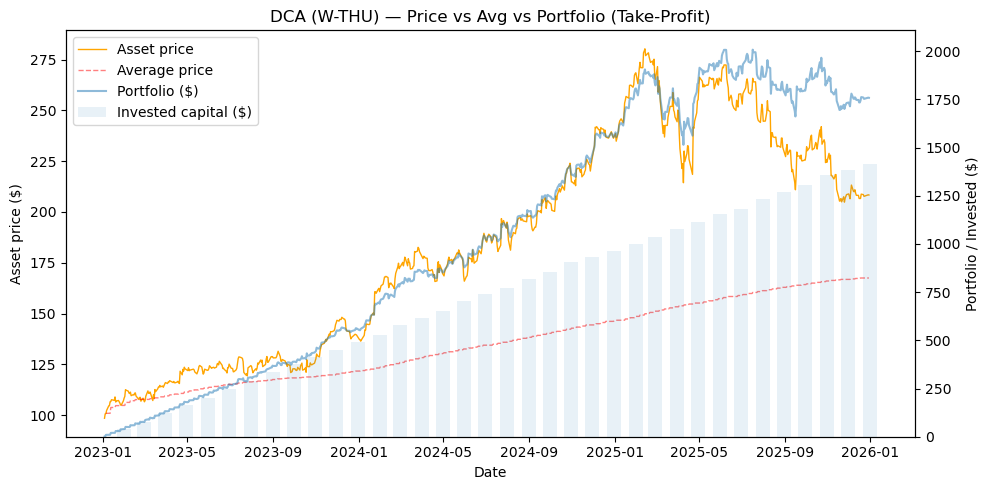

========== RHM.DE ==========


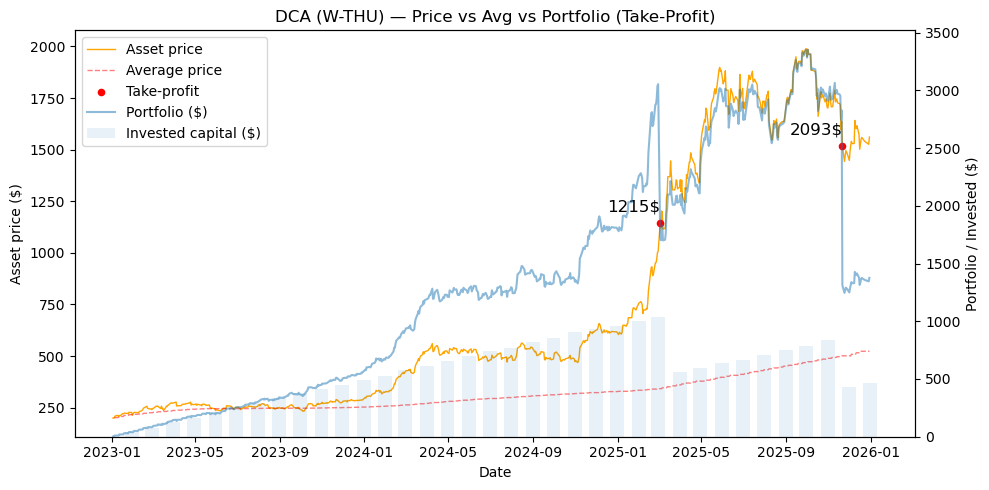

========== HSBA.L ==========


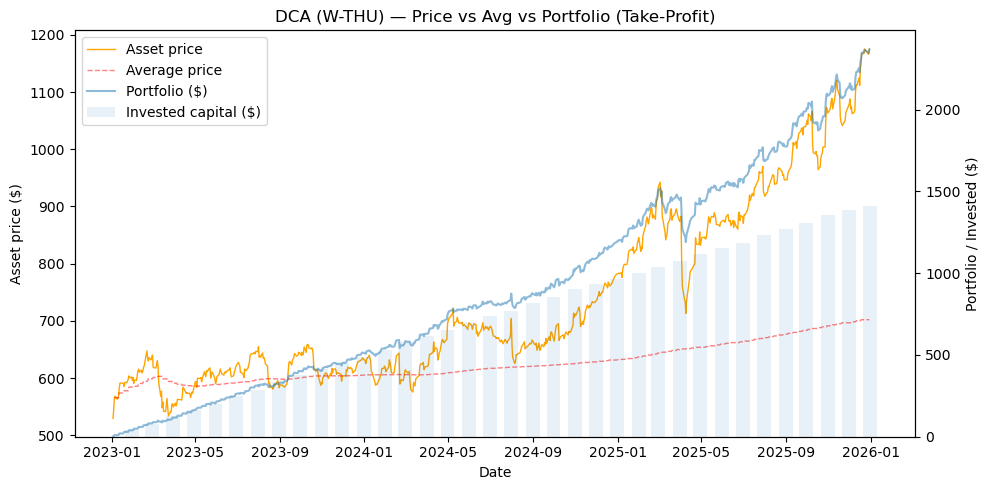

========== BAB.L ==========


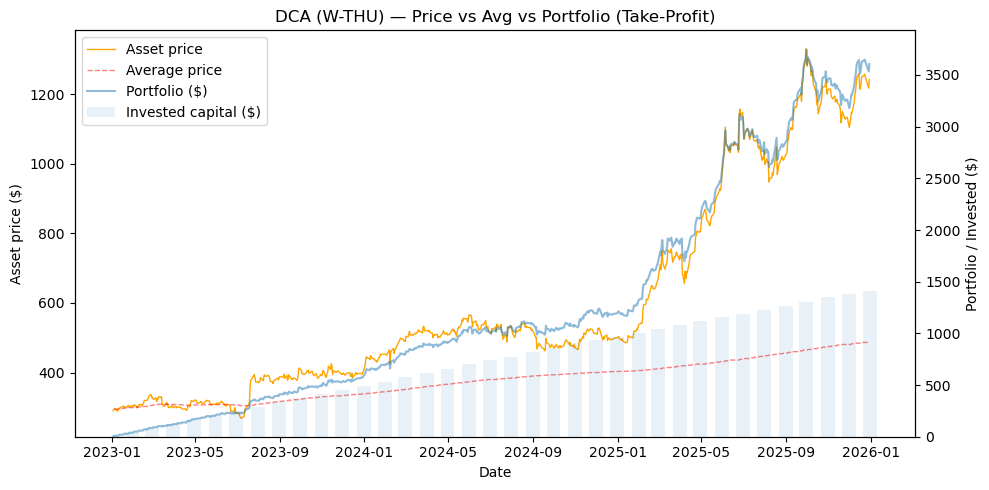

========== IBM ==========


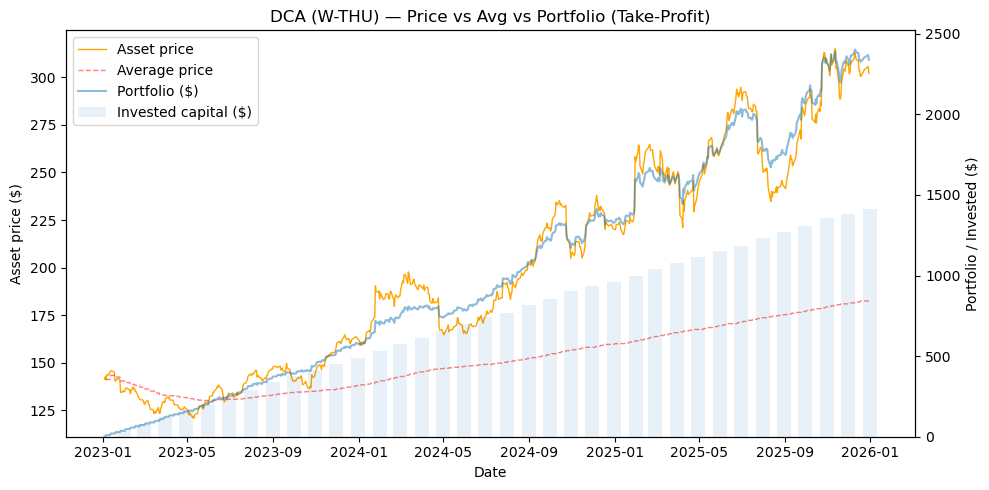

========== ASML.AS ==========


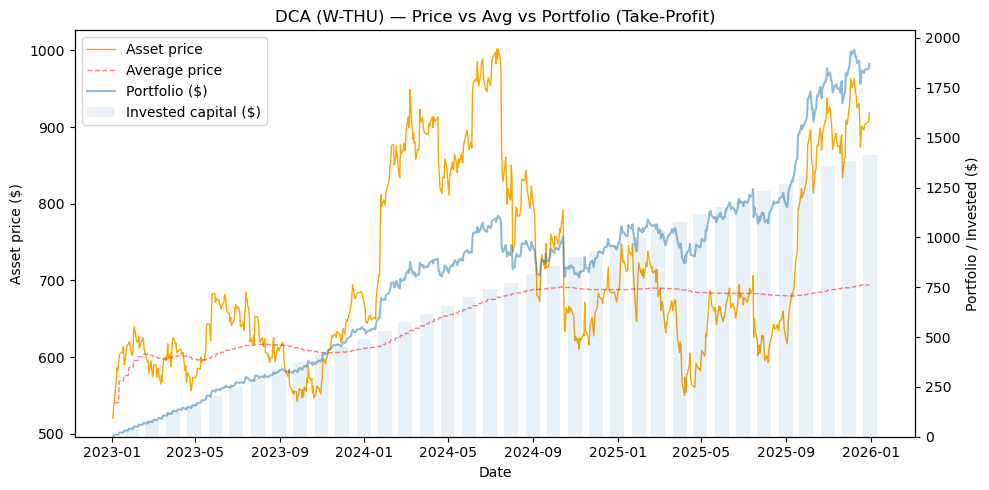

========== JNJ ==========


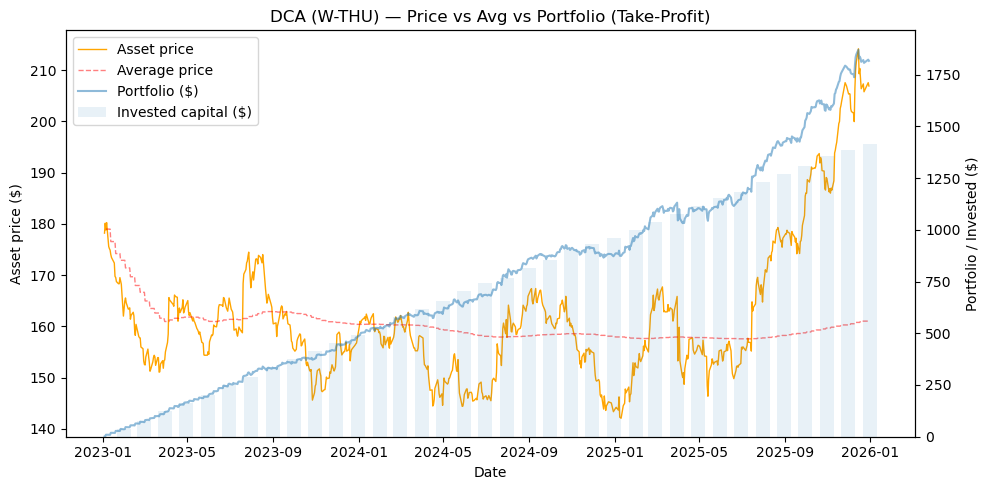

========== GOOGL ==========


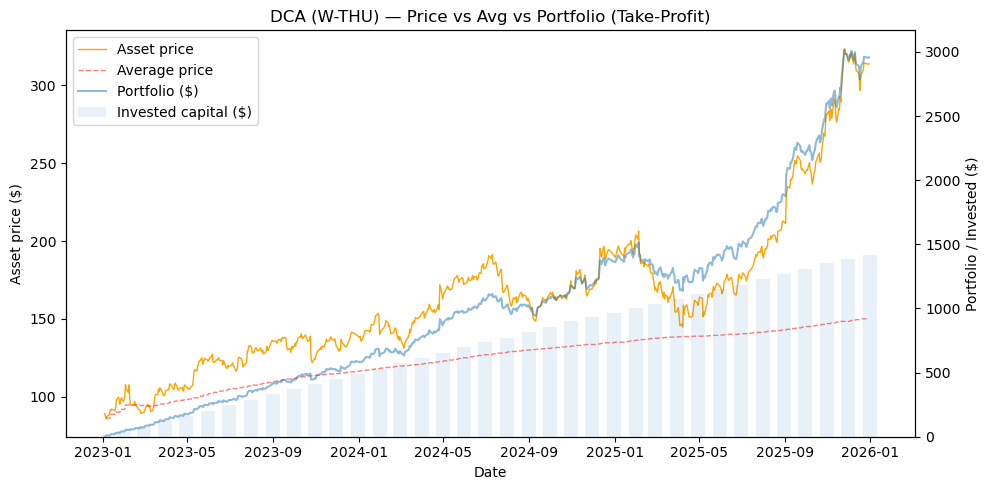

========== AAPL ==========


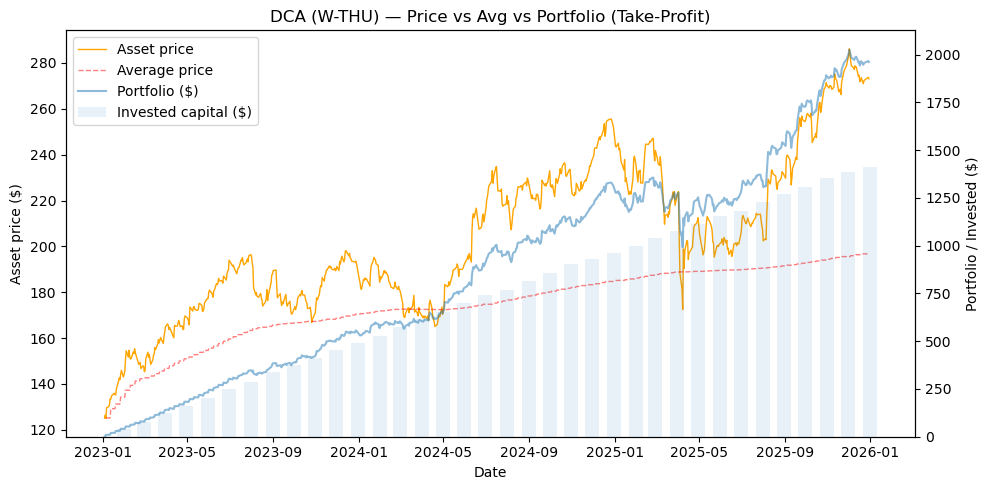

========== MSFT ==========


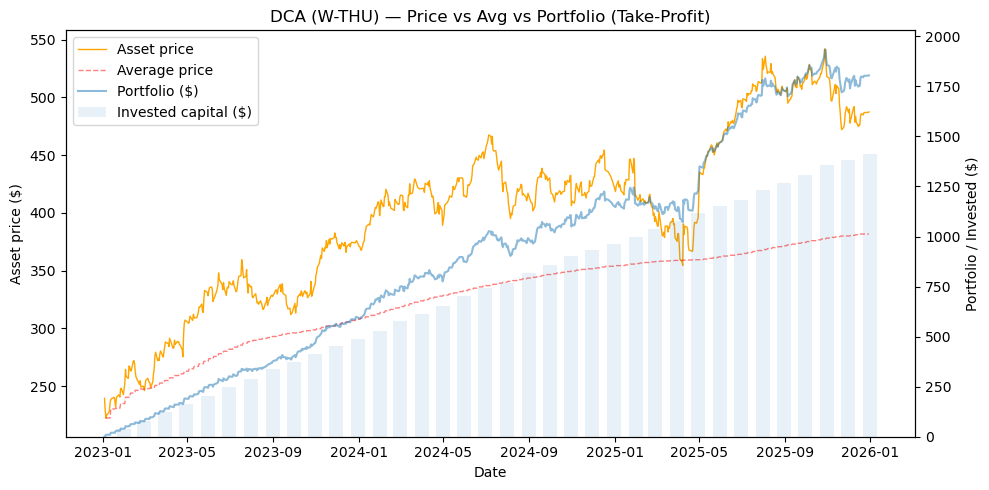

In [13]:
res = {}
metric = {}

selected_symbols = list(df.columns)[:10]
total_investment = 10_000
individual_investment = total_investment / len(selected_symbols)

total_days = len(df)
total_days = total_days // 7

for symbol in selected_symbols:
    print("=" * 10, symbol, "=" * 10)

    invest_sum = individual_investment / total_days

    prices = df[symbol]

    dca_result_one, dca_metrics_one = backtest_dca(
        prices=prices,
        buy_amount=invest_sum,
        freq="W-THU",
        available_sum=1_000_000,
        fee=0.001,
        cooldown_days=180,
        profit_multiple=3,
        plot=True
    )

    res[symbol] = dca_metrics_one
    metric[symbol] = dca_metrics_one

In [14]:
results = pd.DataFrame(res).T

In [15]:
results.sort_values(by="Total_equity", ascending=False)

,Cash_spent,Final_portfolio_value,Realized_profit,Total_returns,Total_equity,Num_take_profits
RHM.DE,1413,1376,2093,3045,4421,2
BAB.L,1413,3605,0,0,3605,0
GOOGL,1413,2956,0,0,2956,0
HSBA.L,1413,2366,0,0,2366,0
IBM,1413,2339,0,0,2339,0
AAPL,1413,1962,0,0,1962,0
ASML.AS,1413,1870,0,0,1870,0
JNJ,1413,1816,0,0,1816,0
MSFT,1413,1805,0,0,1805,0
SAP.DE,1413,1757,0,0,1757,0


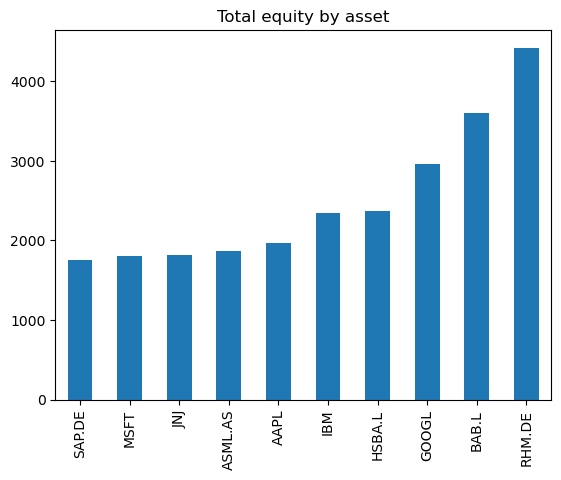

In [16]:
results['Total_equity'].sort_values().plot(kind='bar', title='Total equity by asset');

In [17]:
total_spend = results['Cash_spent'].sum()
total_equity = results['Total_equity'].sum()
total_profit = results['Realized_profit'].sum()

profit = total_equity - total_spend
lift = profit / total_spend * 100

print(f"Total spent: ${total_spend:,.0f}")
print(f"Total equity: ${total_equity:,.0f}")
print(f"Total profit: ${profit:,.0f}")
print(f"Lift: {lift:.2f}%")

Total spent: $14,130
Total equity: $24,897
Total profit: $10,767
Lift: 76.20%


In [18]:
results.index.tolist()

['SAP.DE',
 'RHM.DE',
 'HSBA.L',
 'BAB.L',
 'IBM',
 'ASML.AS',
 'JNJ',
 'GOOGL',
 'AAPL',
 'MSFT']